### Import Packages

In [1]:
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import signal
from sklearn.linear_model import LinearRegression

import sys
from ANALYSIS.modules.segment import *
from ANALYSIS.modules.rotate import *
from ANALYSIS.modules.custom_graph import *

### Import Datasets

In [2]:
# quiet = pd.read_csv("DATA/Original_Data/spiro-quiet.csv")
# deep = pd.read_csv("DATA/Original_Data/spiro-deep.csv")
# run = pd.read_csv("DATA/Original_Data/spiro-run.csv")

# dataset = [quiet, deep, run]
# dataset_names = ["quiet", "deep", "run"]

### Create Graphs

#### Graph all graphs

In [3]:
# for i in range(len(dataset)):
#     segmenting_in_plot(dataset[i], start_time=0, time_length=180, run_count=i+1)
#     plot(vars(sys.modules[__name__])[f"{dataset[i]}_segmented"], run_count=i+1)
    

In [4]:
# # Segmenting Data
# segmented_quiet = segmenting(quiet, start_time=0, time_length=180)
# segmented_deep = segmenting(deep, start_time=0, time_length=180, run_count=1)
# segmented_run = segmenting(run, start_time=0, time_length=20, run_count=2)

# fig, axs = plt.subplots(2, 2)
# plot(segmented_run, run_count=3, names=["Running"]*3)
# plot(segmented_quiet, run_count=1, names=["quiet"]*3)
# plot(segmented_deep,run_count=2, names=["deep"]*3)

In [5]:
# plot(segmented_run, run_count=3, names=["Spirometry Run"]*3)

#### Graph Running and Rotated Sine Wave

##### Sine Wave + Rotated + Running

In [6]:
segmented_run = pd.read_csv("DATA/Segmented_Data/segmented_run.csv")
print(segmented_run.columns)
segmented_run_X = segmented_run['Run 3: Time (s)']
segmented_run_Y = segmented_run['Run 3: Volume (L)']

Index(['Unnamed: 0', 'Run 1: Time (s)', 'Run 1: Flow Rate (L/s)',
       'Run 1: Volume (L)', 'Run 2: Time (s)', 'Run 2: Flow Rate (L/s)',
       'Run 2: Volume (L)', 'Run 3: Time (s)', 'Run 3: Flow Rate (L/s)',
       'Run 3: Volume (L)'],
      dtype='object')


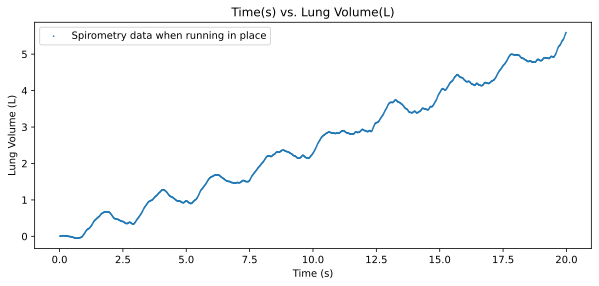

In [7]:
# Plot a sine wave
x = np.arange(0, 20, 0.01)
# Amplitude of the sine wave is sine of a variable like time
y = np.sin(x)
xr, yr = rotate_matrix(x, y, angle=12)

fig = plt.figure(figsize=(10, 9))
plot(segmented_run, run_count=3, names=["Spirometry data when running in place"]*3)
# plt.plot(x, y, label="Sine Wave y = sin(x)")
# plt.plot(xr, yr, label="Rotated y = sin(x) by 12 degrees")
plt.legend()

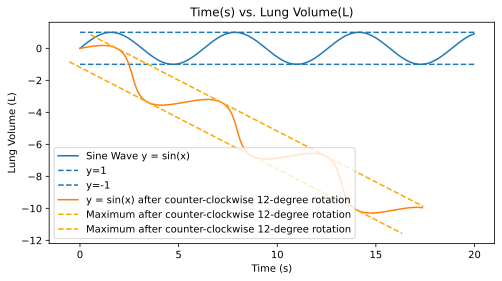

In [8]:
max_x = np.arange(0, 20, 0.01)
max_y = np.ones(2000)
min_y = -(max_y)

max_xr, max_yr = rotate_matrix(max_x, max_y, angle=12)
min_xr, min_yr = rotate_matrix(max_x, min_y, angle=12)


fig = plt.figure(figsize=(8, 4))

plt.title("Time(s) vs. Lung Volume(L)")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")

plt.plot(x, y, label="Sine Wave y = sin(x)")
plt.plot(max_x, max_y, label="y=1", linestyle="dashed", color="#1f77b4")
plt.plot(max_x, min_y, label="y=-1", linestyle="dashed", color="#1f77b4")
plt.plot(xr, yr, label="y = sin(x) after counter-clockwise 12-degree rotation")
plt.plot(max_xr, max_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.plot(min_xr, min_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.legend()

#### Find Local Maximum and Minimum

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/970570425.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_x = peak_x.append(pd.Series(segmented_run['Run 3: Time (s)'].iat[-1]))
/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/970570425.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_y = peak_y.append(pd.Series(segmented_run['Run 3: Volume (L)'].iat[-1]))


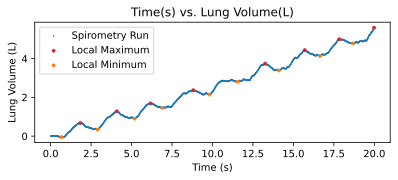

In [9]:

# find peaks
peak_indexes = signal.argrelextrema(segmented_run_Y.values, np.greater, order=42)
peak_indexes = peak_indexes[0]

peak_x = segmented_run['Run 3: Time (s)'][peak_indexes]
peak_x = peak_x.append(pd.Series(segmented_run['Run 3: Time (s)'].iat[-1]))
peak_x.drop(index=peak_x.index[0], axis=0, inplace=True)
peak_y = segmented_run_Y[peak_indexes]
peak_y = peak_y.append(pd.Series(segmented_run['Run 3: Volume (L)'].iat[-1]))
peak_y.drop(index=peak_y.index[0], axis=0, inplace=True)


# find valleys
valley_indexes = signal.argrelextrema(segmented_run_Y.values, np.less, order=27)
valley_indexes = valley_indexes[0]

valley_x = segmented_run['Run 3: Time (s)'][valley_indexes]
valley_y = segmented_run_Y[valley_indexes]


plot(segmented_run, run_count=3)
plt.scatter(peak_x, peak_y, s=8, label="Local Maximum", color="C3")
plt.scatter(valley_x, valley_y, s=8, label="Local Minimum", color="C1")
plt.legend()

In [10]:
type(peak_x)

pandas.core.series.Series

In [11]:
peak_x = peak_x.to_numpy().reshape(-1,1)
peak_y = peak_y.to_numpy().reshape(-1,1)

In [12]:

print(f"Maximum Points' X Coordinates: \n{peak_x}")
print(f"Maximum Points' Y Coordinates: \n{peak_y}")
reg = LinearRegression().fit(peak_x, peak_y)
print(f"The score = {reg.score(peak_x, peak_y)}")
print(f"Coefficient: {reg.coef_[0][0]}")
print(f"Intercept: {reg.intercept_[0]}")

fig = plt.figure(figsize=(12, 8))
predicted_peak_y = reg.predict(peak_x)


Maximum Points' X Coordinates: 
[[ 1.83337 ]
 [ 4.083415]
 [ 6.16679 ]
 [ 8.816843]
 [13.250265]
 [15.700314]
 [17.83369 ]
 [19.983733]]
Maximum Points' Y Coordinates: 
[[0.67643984]
 [1.28137271]
 [1.68904828]
 [2.36758551]
 [3.74385247]
 [4.43798153]
 [4.9970418 ]
 [5.59319196]]
The score = 0.9981792171307305
Coefficient: 0.274405782690469
Intercept: 0.0912240848414041


<Figure size 1200x800 with 0 Axes>

In [13]:
# predicted_peak_y = np.insert(predicted_peak_y, 0, reg.predict([[0]]))
# peak_x = np.insert(peak_x, 0, np.array([[0]]))

In [14]:
predicted_peak_y[0]

array([0.59431141])

In [15]:
peak_x[-1][0]

19.983733

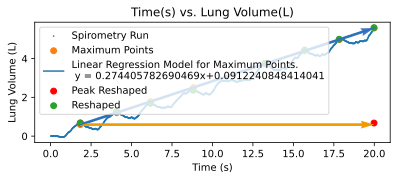

In [16]:
line_position_vector = [peak_x[0][0], predicted_peak_y[0][0]]
line_direction_vector = [peak_x[-1][0] - peak_x[0][0], predicted_peak_y[-1][0] - predicted_peak_y[0][0]]

straight_line_position_vector = line_position_vector

straight_line_direction_vector = [peak_x[-1][0] - peak_x[0][0], predicted_peak_y[0][0] - predicted_peak_y[0][0]]

plot(segmented_run, run_count=3)
plt.scatter(peak_x, predicted_peak_y, label="Maximum Points")
plt.plot(peak_x, predicted_peak_y, label=f"Linear Regression Model for Maximum Points. \n y = {reg.coef_[0][0]}x+{reg.intercept_[0]}")
plt.scatter([peak_x[0][0], peak_x[-1][0]], [peak_y[0][0], peak_y[0][0]], color = 'r', linestyle = '-', label="Peak Reshaped")
plt.scatter(peak_x, peak_y, label="Reshaped")
# plt.plot([peak_x[0], peak_x[-1]], [peak_y[0], peak_y[0]], color = 'r', linestyle = '-')

# Triangle's Hypotenuse
plt.quiver(*line_position_vector, *line_direction_vector, angles='xy', scale_units='xy', scale=1, color='#4472C4')

# Triangle's Base
plt.quiver(*straight_line_position_vector, *straight_line_direction_vector, angles='xy', scale_units='xy', scale=1, color='#ee9a00')

plt.legend()

In [17]:
print(f"Direction Vector: {line_direction_vector}")
print(f"Position Vector: {line_position_vector}")

Direction Vector: [18.150363000000002, 4.98056456513113]
Position Vector: [1.83337, 0.5943114146526293]


In [18]:
print(line_position_vector)
print(line_direction_vector)

print(straight_line_position_vector)
print(line_direction_vector)

[1.83337, 0.5943114146526293]
[18.150363000000002, 4.98056456513113]
[1.83337, 0.5943114146526293]
[18.150363000000002, 4.98056456513113]


#### Calculating the Angle with Cos(theta)

In [19]:
line = np.array(line_position_vector) + np.array(line_direction_vector)
line_norm = np.linalg.norm(line)
straight_line = np.array(straight_line_position_vector) + np.array(straight_line_direction_vector)
straight_line_norm = np.linalg.norm(straight_line)
print(f"Line: {line}")
print(f"Horizontal Line: {straight_line}")

print(f"arccos theta = {np.arccos(np.dot(straight_line, line) / np.array(straight_line_norm * line_norm))}")
theta = np.arccos(np.dot(straight_line, line) / np.array(straight_line_norm * line_norm))
theta = float(theta)

Line: [19.983733    5.57487598]
Horizontal Line: [19.983733    0.59431141]
arccos theta = 0.24232298205588348


#### Rotation

In [20]:
# Rotating Spirometry Data
# segmented_run_Y_shifted = shift_up(data = segmented_run_Y, shift_value = segmented_run_X
sr_xr, sr_yr = negative_rotate_matrix(x=segmented_run_X,y=segmented_run_Y, angle=(theta), units="RADIAN")
# Rotating the Maximum Line
srl_xr, srl_yr = negative_rotate_matrix(x=peak_x,y=predicted_peak_y, angle=(theta), units="RADIAN")

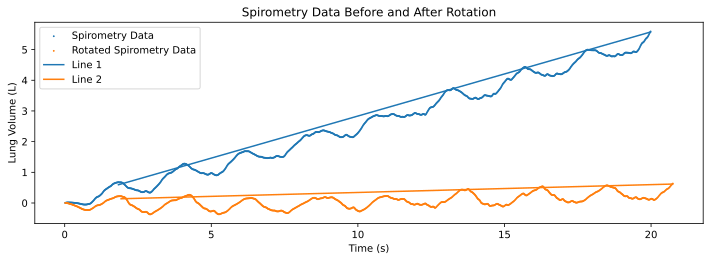

In [21]:
fig = plt.figure(figsize=(12, 8))
plot(segmented_run, run_count=3, names=["Spirometry Data"]*3, size=0.8)
plt.title("Spirometry Data Before and After Rotation")

# Rotated Spirometry Data
plt.scatter(sr_xr, sr_yr, label="Rotated Spirometry Data", s=0.8)

# Maximum Line
plt.plot(peak_x, predicted_peak_y, label="Line 1")

# Rotated Maximum Line
plt.plot(srl_xr, srl_yr, label="Line 2")

plt.legend()

y = 0.025496228383175914x + 0.08800069474556077


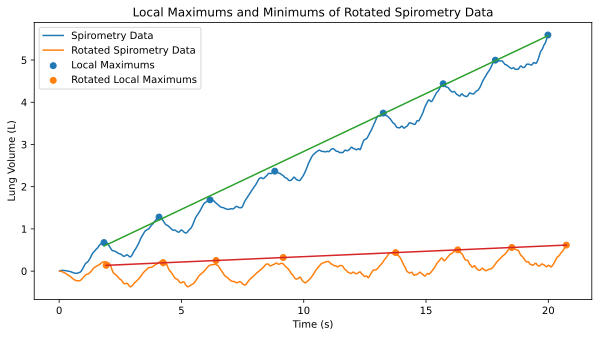

In [22]:
reg_line = LinearRegression().fit(srl_xr.reshape(-1, 1), srl_yr.reshape(-1, 1))
print(f"y = {reg_line.coef_[0][0]}x + {reg_line.intercept_[0]}")


# # find peaks
# peak_indexes = signal.argrelextrema(sr_yr.values, np.greater, order=30)
# peak_indexes = peak_indexes[0]

# peak_x = sr_xr[peak_indexes]
# peak_y = sr_yr[peak_indexes]

# # find valleys
# valley_indexes = signal.argrelextrema(sr_yr.values, np.less, order=30)
# valley_indexes = valley_indexes[0]

# valley_x = sr_xr[valley_indexes]
# valley_y = sr_yr[valley_indexes]

fig = plt.figure(figsize=(10, 5))
plt.title("Local Maximums and Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.plot(segmented_run_X, segmented_run_Y, label="Spirometry Data")
plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
# plt.scatter(valley_x, valley_y, label="Local Minimums")
plt.scatter(peak_x, peak_y, label="Local Maximums")
plt.scatter(srl_xr, srl_yr, label="Rotated Local Maximums")
plt.plot(peak_x, predicted_peak_y)
plt.plot(srl_xr, srl_yr)
plt.legend()

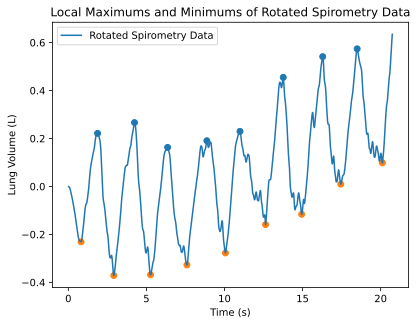

In [23]:
# find peaks of rotated data
peak_indexes_rotated = signal.argrelextrema(sr_yr.values, np.greater, order=30)
peak_indexes_rotated = peak_indexes_rotated[0]

peak_x_rotated = sr_xr[peak_indexes_rotated]
peak_y_rotated = sr_yr[peak_indexes_rotated]

# find valleys
valley_indexes_rotated = signal.argrelextrema(sr_yr.values, np.less, order=30)
valley_indexes_rotated = valley_indexes_rotated[0]

valley_x_rotated = sr_xr[valley_indexes_rotated]
valley_y_rotated = sr_yr[valley_indexes_rotated]


plt.title("Local Maximums and Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
plt.scatter(peak_x_rotated, peak_y_rotated)
plt.scatter(valley_x_rotated, valley_y_rotated)
plt.legend()

In [24]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return -a * np.cos(-b * x) + c


popt, pcov = curve_fit(xdata=sr_xr, ydata=sr_yr, f=func, bounds=([0.3, 2.7, -0.2], [2., 2.71, np.Inf]))


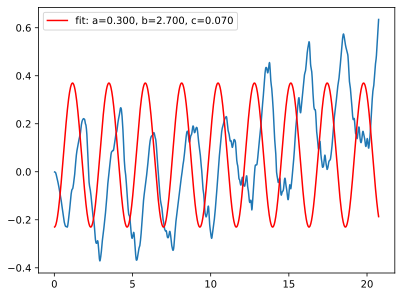

In [25]:
plt.plot(sr_xr, sr_yr)
plt.plot(sr_xr, func(sr_xr, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()


### Separating two halfs

In [26]:
# ffr_peak_x, ffr_peak_y = negative_rotate_matrix(x=peak_x[:4],y=peak_y[:4], angle=(theta), units="RADIAN")
ffr_peak_x = np.array(peak_x_rotated[:4]).reshape(-1, 1)
ffr_peak_y = np.array(peak_y_rotated[:4]).reshape(-1, 1)

lfr_peak_x = np.array(peak_x_rotated[4:]).reshape(-1, 1)
lfr_peak_y = np.array(peak_y_rotated[4:]).reshape(-1, 1)

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/1917206801.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ffr_peak_x = np.array(peak_x_rotated[:4]).reshape(-1, 1)
/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/1917206801.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ffr_peak_y = np.array(peak_y_rotated[:4]).reshape(-1, 1)
/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/1917206801.py:5: FutureWarning: The behavior of `ser

### First Half

#### Demonstration Graph

In [27]:
reg = LinearRegression().fit(ffr_peak_x, ffr_peak_y)
predicted_ffr_peak_y = reg.predict(ffr_peak_x)

# Triangle's Hypotenuse
position_vector1 = [ffr_peak_x[0][0], predicted_ffr_peak_y[0][0]]
direction_vector1 = [ffr_peak_x[-1][0]-ffr_peak_x[0][0],predicted_ffr_peak_y[-1][0]-predicted_ffr_peak_y[0][0]]

# Triangle's Base
position_vector2 = position_vector1
direction_vector2 = [ffr_peak_x[-1][0]-ffr_peak_x[0][0],0]

# Second
reg2 = LinearRegression().fit(lfr_peak_x, lfr_peak_y)
predicted_lfr_peak_y = reg2.predict(lfr_peak_x)

# Triangle's Hypotenuse
"""
Position Vector ()
"""
position_vector3 = [lfr_peak_x[0][0], predicted_lfr_peak_y[0][0]]
direction_vector3 = [lfr_peak_x[-1][0]-lfr_peak_x[0][0],(predicted_lfr_peak_y[-1][0]+(-predicted_lfr_peak_y[0][0]))]

## Triangle's Base
position_vector4 = position_vector3
direction_vector4 = [lfr_peak_x[-1][0]-lfr_peak_x[0][0],0]

In [28]:
print(f"Position Vector 1: {position_vector1}")
print(f"Direction Vector 2: {direction_vector2}")
print(f"Position Vector 2: {position_vector2}")
print(f"Direction Vector 2: {direction_vector2}")
print(f"Line Norm: {line_norm}")
print(f"Straight Line Norm: {straight_line_norm}")

Position Vector 1: [1.8746197677085121, 0.2386004576194454]
Direction Vector 2: [6.997198366992676, 0]
Position Vector 2: [1.8746197677085121, 0.2386004576194454]
Direction Vector 2: [6.997198366992676, 0]
Line Norm: 20.746778709121543
Straight Line Norm: 19.992568386099755


#### Calculate theta2
Rotate the first half by theta2

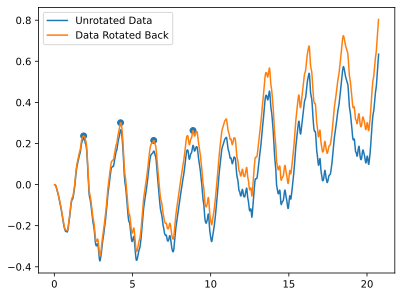

In [29]:
# Computing the angle
line_norm = np.linalg.norm(np.array(direction_vector1))
straight_line_norm = np.linalg.norm(np.array(direction_vector2))
theta2 = math.acos(np.dot(np.array(direction_vector1),np.array(direction_vector2))/straight_line_norm/line_norm)

srff_xrr, srff_yrr = rotate_matrix(x=sr_xr,y=sr_yr, angle=(theta2), units="RADIAN")
srffour_xr, srffour_yr = rotate_matrix(x=ffr_peak_x,y=ffr_peak_y, angle=(theta2), units="RADIAN")

# Plot
plt.plot(sr_xr, sr_yr, label="Unrotated Data")
plt.plot(srff_xrr, srff_yrr, label="Data Rotated Back")
plt.scatter(srffour_xr, srffour_yr)
plt.legend()

#### Plotting

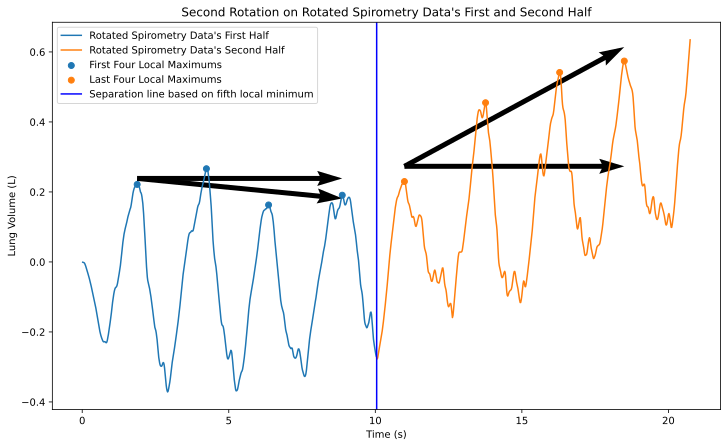

In [30]:
fig = plt.figure(figsize=(12, 7))

plt.plot(sr_xr[:588], sr_yr[:588], label="Rotated Spirometry Data's First Half")
plt.plot(sr_xr[588:], sr_yr[588:], label="Rotated Spirometry Data's Second Half")

# Local Maximums
plt.scatter(ffr_peak_x, ffr_peak_y, label="First Four Local Maximums")
plt.scatter(lfr_peak_x, lfr_peak_y, label="Last Four Local Maximums")

# Line of separation
plt.axvline(x=srff_xrr[588], color = 'b', label = 'Separation line based on fifth local minimum')

# Linear Regression Line
# plt.plot(ffr_peak_x, predicted_ffr_peak_y)
# plt.plot(lfr_peak_x, predicted_lfr_peak_y)

# Vectors
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1)

plt.title("Second Rotation on Rotated Spirometry Data's First and Second Half")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")

plt.legend()

### Second Half

#### Calculate theta3

In [31]:
# Finding angle between the two vectors: angle theta3
line_norm = np.linalg.norm(np.array(direction_vector3))
straight_line_norm = np.linalg.norm(np.array(direction_vector4))
theta3 = math.acos(np.dot(np.array(direction_vector3), np.array(direction_vector4))/straight_line_norm/line_norm)

# Rotation
srlf_xrr, srlf_yrr = negative_rotate_matrix(x=sr_xr,y=sr_yr, angle=(theta3), units="RADIAN")
lfr_xr, lfr_yr = negative_rotate_matrix(x=lfr_peak_x,y=lfr_peak_y, angle=(theta3), units="RADIAN")

#### Demonstration Graph

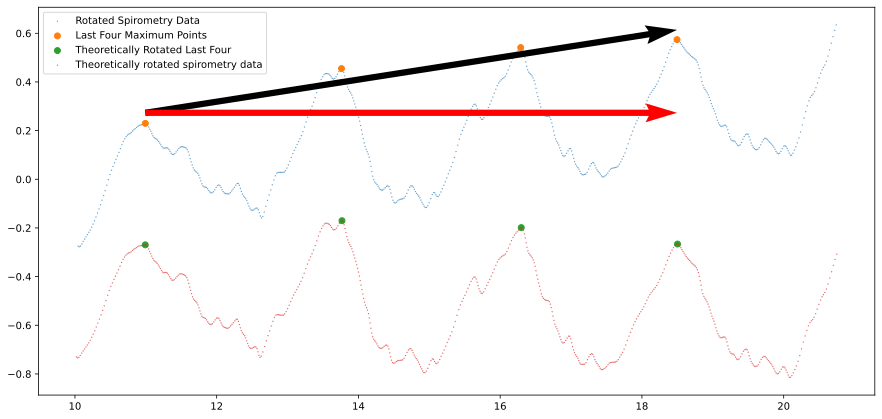

In [32]:
# Figure Size
fig = plt.figure(figsize=(15, 7))

plt.scatter(sr_xr[588:], sr_yr[588:], label="Rotated Spirometry Data", s=0.1)
plt.scatter(lfr_peak_x, lfr_peak_y, label="Last Four Maximum Points")
plt.scatter(lfr_xr, lfr_yr, label="Theoretically Rotated Last Four")
plt.scatter(srlf_xrr[588:], srlf_yrr[588:], label="Theoretically rotated spirometry data", s=0.1)

# Vectors
plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1, color="red")

plt.legend()

In [33]:
SHIFT_VALUE = sr_yr[588] - srlf_yrr[588]
lfr_yr = lfr_yr + SHIFT_VALUE
srlf_yrr = shift_up(srlf_yrr, shift_value=SHIFT_VALUE)

In [34]:
print(sr_yr[588])
print(srlf_yrr[588])

-0.2743908678883118
-0.2743908678883118


In [35]:
lfr_yr

array([[0.18624917],
       [0.28547247],
       [0.25710295],
       [0.18955521]])

## Drawing the two halfs together

plt.scatter(ffr_peak_x, ffr_peak_y)
plt.plot(ffr_peak_x, predicted_ffr_peak_y)

position_vector3 = [ffr_peak_x[0][0], predicted_ffr_peak_y[0][0]]
direction_vector3 = [ffr_peak_x[-1][0]-ffr_peak_x[0][0],predicted_ffr_peak_y[-1][0]-predicted_ffr_peak_y[0][0]]
plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)

position_vector4 = position_vector3
direction_vector4 = [ffr_peak_x[-1][0]-ffr_peak_x[0][0],0]
plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)

In [36]:
srff_xrr[587]

10.030532720516083

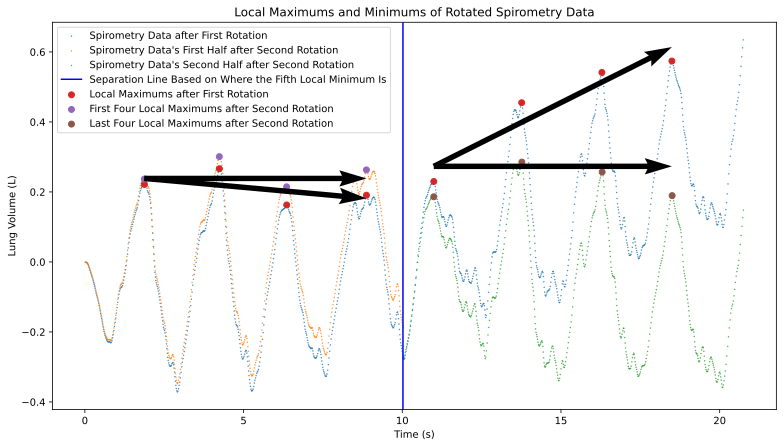

In [53]:
# Figure setting
fig = plt.figure(figsize=(13, 7))
## Drawing the base rotated spirometry data
# plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
plt.scatter(sr_xr, sr_yr, label="Spirometry Data after First Rotation", s=0.2)

# Rotated First Four Spirometry Data
plt.scatter(srff_xrr[:588], srff_yrr[:588], s=0.2, label="Spirometry Data's First Half after Second Rotation")
# plt.scatter(srff_xrr[587], srff_yrr[587], label="Point of Separation")

# Rotated Last Four Spirometry Data
plt.scatter(srlf_xrr[588:], srlf_yrr[588:], label="Spirometry Data's Second Half after Second Rotation", s=0.2)
# plt.scatter(srlf_xrr[588], srlf_yrr[589], label="Point of Separation")
plt.axvline(x=srlf_xrr[588], color = 'b', label = 'Separation Line Based on Where the Fifth Local Minimum Is')

plt.scatter(peak_x_rotated, peak_y_rotated, label="Local Maximums after First Rotation")
plt.scatter(srffour_xr, srffour_yr, label="First Four Local Maximums after Second Rotation")
plt.scatter(lfr_xr, lfr_yr, label="Last Four Local Maximums after Second Rotation")


# Vectors for the First Four 
plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1)

# Vectors for the Last Four
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)

plt.title("Local Maximums and Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.legend()


plt.legend()

In [38]:
print(f"({sr_xr[588]}, {sr_yr[588]}")
print(f"({srlf_xrr[588]}, {srlf_yrr[588]}")

(10.044488672307475, -0.2743908678883118
(10.021678265180581, -0.2743908678883118


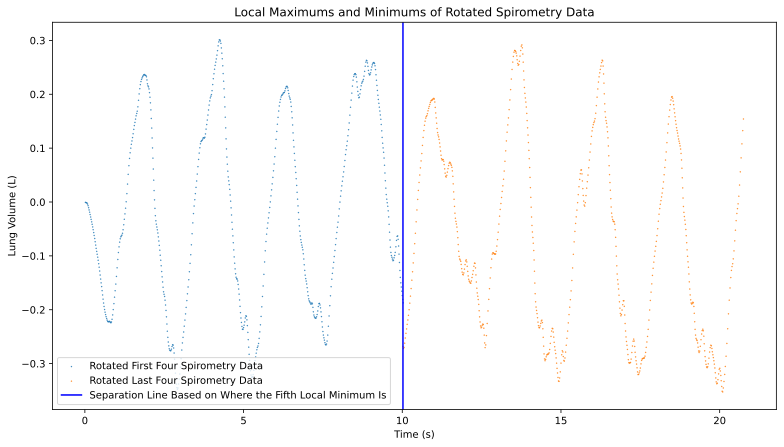

In [41]:
# Figure setting
fig = plt.figure(figsize=(13, 7))
## Drawing the base rotated spirometry data
# plt.scatter(sr_xr, sr_yr, label="Rotated Spirometry Data", s=0.2)

# Rotated First Four Spirometry Data
plt.scatter(srff_xrr[:588], srff_yrr[:588], s=0.2, label="Rotated First Four Spirometry Data")
# plt.scatter(srff_xrr[587], srff_yrr[587], label="Point of Separation")

# Rotated Last Four Spirometry Data
plt.scatter(srlf_xrr[588:], srlf_yrr_up[588:], label="Rotated Last Four Spirometry Data", s=0.2)
# plt.scatter(srlf_xrr[588], srlf_yrr_up[589], label="Point of Separation")
plt.axvline(x=srlf_xrr[588], color = 'b', label = 'Separation Line Based on Where the Fifth Local Minimum Is')


# plt.scatter(srlf_xrr, srlf_yrr_up)

# plt.scatter(ffr_peak_x, ffr_peak_y, label="First Four UnRotated Local Maximums")
# plt.scatter(srffour_xr, srffour_yr, label="First Four Rotated Local Maximums")
# plt.scatter(peak_x, peak_y, label="Last Four UnRotated Local Maximums")
# plt.scatter(lfr_xr, lfr_yr, label="Last Four Rotated Local Maximums")

"""
# Vectors for the First Four 
plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1)

# Vectors for the Last Four
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)
plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)
"""

plt.title("Local Maximums and Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.legend()

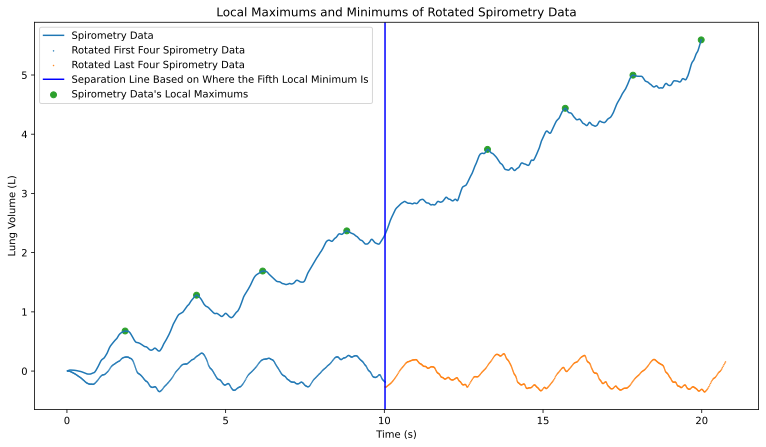

In [42]:
# Figure setting
fig = plt.figure(figsize=(13, 7))
plt.plot(segmented_run_X, segmented_run_Y, label="Spirometry Data")
## Drawing the base rotated spirometry data
# plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
# plt.scatter(sr_xr, sr_yr, label="Rotated Spirometry Data", s=0.2)

# Rotated First Four Spirometry Data
plt.scatter(srff_xrr[:588], srff_yrr[:588], s=0.3, label="Rotated First Four Spirometry Data")

# Rotated Last Four Spirometry Data
plt.scatter(srlf_xrr[588:], srlf_yrr_up[588:], s=0.3, label="Rotated Last Four Spirometry Data", )
# plt.scatter(srlf_xrr[588:], srlf_yrr[588:], label="Rotated Last Four Spirometry Data", s=0.2)
# plt.scatter(srlf_xrr[588], srlf_yrr[589], label="Point of Separation")
plt.axvline(x=srlf_xrr[588], color = 'b', label = 'Separation Line Based on Where the Fifth Local Minimum Is')



# Unrotated Local Maximums
# plt.scatter(ffr_peak_x, ffr_peak_y, label="First Four UnRotated Local Maximums")
plt.scatter(peak_x, peak_y, label="Spirometry Data's Local Maximums")

# Rotated Local Maximums 
# plt.scatter(srffour_xr, srffour_yr, label="First Four Rotated Local Maximums")
# plt.scatter(lfr_xr, lfr_yr, label="Last Four Rotated Local Maximums")


# Vectors for the First Four 
# plt.quiver(*position_vector3, *direction_vector3, angles='xy', scale_units='xy', scale=1)
# plt.quiver(*position_vector4, *direction_vector4, angles='xy', scale_units='xy', scale=1)

# # Vectors for the Last Four
# plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)
# plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)

plt.title("Local Maximums and Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.legend()


plt.legend()

## Saving Data

In [43]:
# pd.DataFrame(np.column_stack((srff_xrr[:588], srff_yrr[:588]))).to_csv("first_half_wave.csv")
# pd.DataFrame(np.column_stack((srlf_xrr[588:], srlf_yrr[588:]))).to_csv("second_half_wave.csv")
# pd.DataFrame(np.column_stack((srlf_xrr[588:], srlf_yrr_up[588:]))).to_csv("second_half_wave_shifted.csv")

first_half = pd.concat([srff_xrr[:588], srff_yrr[:588]], axis=1)
second_half = pd.concat([srlf_xrr[588:], srlf_yrr_up[588:]], axis=1)
full = pd.concat([first_half, second_half], axis=0)

In [44]:
full.set_axis(["x", "y"], axis="columns", inplace=True)

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_7981/980848838.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  full.set_axis(["x", "y"], axis="columns", inplace=True)


In [45]:
full.to_csv("DATA/Processed_Data/final_unrotated.csv")

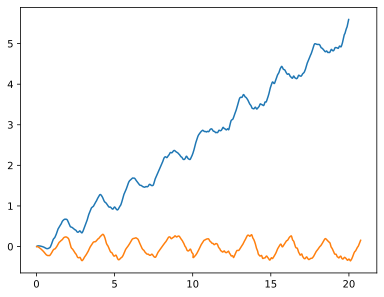

In [46]:
plt.plot(segmented_run_X, segmented_run_Y)
plt.plot(full.x, full.y)
rx, ry = rotate_matrix(x=full.x,y=full.y, angle=(theta), units="RADIAN")


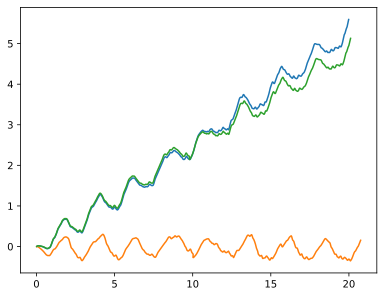

In [47]:
plt.plot(segmented_run_X, segmented_run_Y)
plt.plot(full.x, full.y)
plt.plot(rx, ry)

### Wave Fitting

In [48]:
def ff_fitted_func(x):
    # This function was obtained from Desmos
    return -0.3*np.sin(2.7*x)
predict_srff_yrr = np.vectorize(ff_fitted_func)(srff_xrr)

def lf_fitted_func(x):
    # This function was obtained from Desmos
    return 0.3*np.sin(2.5*(x-5.3))-0.2
predict_srlf_yrr = np.vectorize(lf_fitted_func)(srlf_xrr)


# First Four
srff_xrrb, predict_srff_yrrb = negative_rotate_matrix(srff_xrr, predict_srff_yrr, angle=theta2, units = "RADIANS")
srff_xrrbb, predict_srff_yrrbb = rotate_matrix(srff_xrrb, predict_srff_yrrb, angle=theta, units = "RADIANS")


# Last Four
srlf_xrrb, predict_srlf_yrrb = negative_rotate_matrix(srlf_xrr, predict_srlf_yrr, angle=theta3, units = "RADIANS")
srlf_xrrbb, predict_srlf_yrrbb = rotate_matrix(srlf_xrrb, predict_srlf_yrrb, angle=theta, units = "RADIANS")
srlf_xrrbb, predict_srlf_yrrbb = rotate_matrix(srlf_xrrbb, predict_srlf_yrrbb, angle=theta, units = "RADIANS")

# Combine the two together
combined_x, combined_y = rotate_matrix(srlf_xrrbb, (predict_srff_yrrb.abs() + predict_srlf_yrrb.abs())/2, angle=theta, units = "RADIANS")

fig = plt.figure(figsize=(12, 8))

plot(segmented_run, run_count=3)
plt.scatter(srff_xrr, srff_yrr, s=0.2, label="Rotated Spirometry Run")
plt.scatter(srff_xrr, predict_srff_yrr, s=0.2, label="Rotated fitting of the first four")
plt.scatter(srlf_xrr, predict_srlf_yrr, s=0.2, label="Rotated fitting of the last four")

plt.scatter(srff_xrrbb, predict_srff_yrrbb, s=0.2, label="First Four Rotated Back")
plt.scatter(srlf_xrrbb, predict_srlf_yrrbb, s=0.5, label="Last Four Rotated Back")
plt.scatter(srlf_xrrbb, (predict_srff_yrrb.abs() + predict_srlf_yrrb.abs())/2, s=0.2, label="Combining two absolute values")
plt.scatter(combined_x, combined_y, s=0.5, label="The two fitting combined")
plt.legend()